<a href="https://colab.research.google.com/github/mabataki2/AI-Class/blob/main/Week3/weather_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# -----------------------------
# 1) 데이터 준비
# -----------------------------


df = pd.read_csv("/content/drive/MyDrive/weather.csv").dropna()

# 데이터 누수 방지를 위해 RISK_MM 열과 사용하지 않을 Date, Location 열을 제거
df = df.drop(columns=["RISK_MM", "Date", "Location","RainTomorrow"])
df  # print(df) 와 동일

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No


In [120]:

#레이블 불균형 확인

df['Rainfall'].value_counts()

,count
Rainfall,
0.0,234
0.2,15
0.6,6
0.4,5
0.8,4
1.2,3
1.8,3
1.0,3
3.4,3


In [121]:
# 결측치 확인
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [122]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [123]:
df.columns  # 컬럼명 확인

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [124]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [125]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,90,111,0,15,43,7,8,12,7,2,9,29,15,93,82,7,7,95,129,0
1,138,130,16,20,75,1,12,0,13,1,7,41,22,37,27,5,3,123,145,1
2,135,106,16,27,24,7,33,3,5,2,1,43,55,20,22,8,7,103,99,1
3,133,42,43,34,69,7,20,14,13,15,11,23,42,7,21,2,7,88,50,1
4,86,46,13,26,84,10,18,10,2,10,13,29,35,84,113,7,7,68,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,100,152,0,36,99,6,29,10,7,3,22,1,2,64,46,1,3,148,167,0
362,81,141,0,51,104,3,17,6,6,0,8,6,8,95,98,0,1,120,160,0
363,125,78,0,40,36,2,14,1,1,5,3,24,33,131,147,3,2,96,81,0
364,125,130,0,23,50,7,16,11,14,2,13,30,25,103,91,6,7,107,146,0


In [126]:
y = df['Rainfall']
y.head()

,Rainfall
0,0
1,16
2,16
3,43
4,13


In [127]:
X = df.drop('Rainfall',axis=1)
X.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,90,111,15,43,7,8,12,7,2,9,29,15,93,82,7,7,95,129,0
1,138,130,20,75,1,12,0,13,1,7,41,22,37,27,5,3,123,145,1
2,135,106,27,24,7,33,3,5,2,1,43,55,20,22,8,7,103,99,1
3,133,42,34,69,7,20,14,13,15,11,23,42,7,21,2,7,88,50,1
4,86,46,26,84,10,18,10,2,10,13,29,35,84,113,7,7,68,60,1


In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(262, 19) (262,)
(66, 19) (66,)


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()         # 모델 구성
model.fit(X_train, y_train)        # 모델 훈련
ly_preds = model.predict(X_test)   # 예측데이터 생성
print(mean_squared_error(y_test, ly_preds))  #평가


32.76514327205461


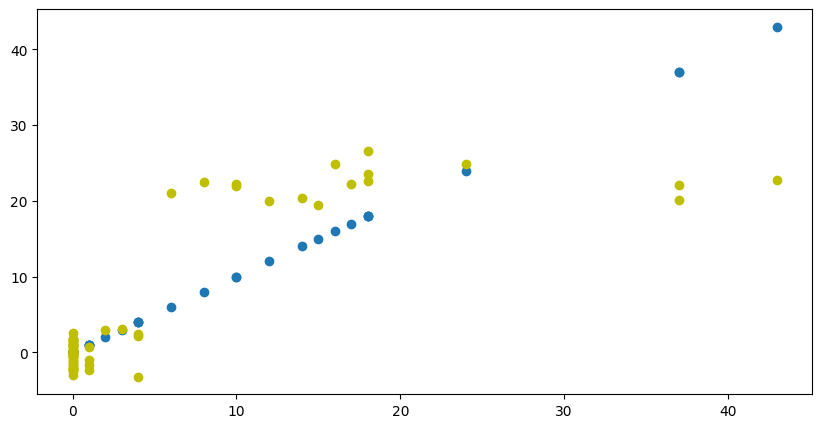

In [130]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test, label='y_test')
plt.scatter(y_test, ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [131]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 29.16888181818182


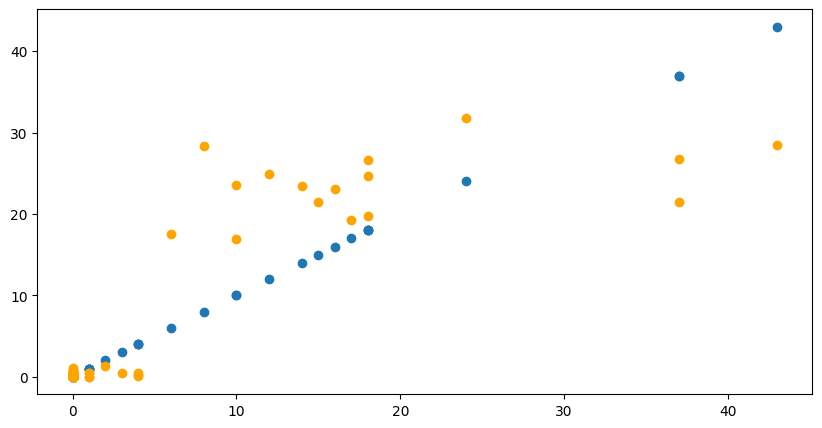

In [132]:

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test, label='y_test')
plt.scatter(y_test, ry_preds, c='orange', label='ry_preds')

plt.show()


In [133]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 44.96969696969697


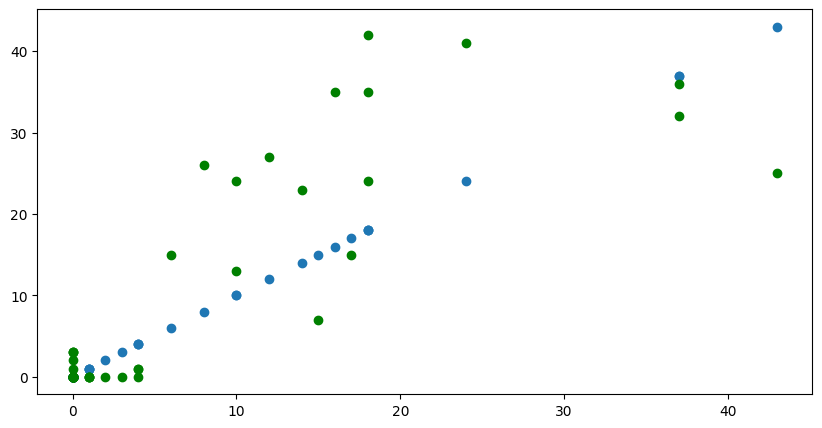

In [134]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test, label='y_test')
plt.scatter(y_test, dy_preds, c='g', label='dy_preds')
plt.show()